In [1]:
# All the imports
import numpy as np
import pandas as pd
import ast 
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Path for all the files
DATA_PATH = "./DATA/"

In [3]:
# Read TED Talks meta data for english language
ted_df = pd.read_csv(DATA_PATH + "ted_talks_en.csv")

In [4]:
ted_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [5]:
ted_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [6]:
# Get the relavant columns
ted_df = ted_df[['talk_id','title','all_speakers','occupations','about_speakers','topics','description', 'transcript']]

In [7]:
ted_df.head()

,talk_id,title,all_speakers,occupations,about_speakers,topics,description,transcript
0,1,Averting the climate crisis,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...","['Africa', 'Asia', 'Google', 'demo', 'economic...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,"['computers', 'entertainment', 'interface desi...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,"['MacArthur grant', 'activism', 'business', 'c...","In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...","['children', 'creativity', 'culture', 'dance',...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [8]:
# Check if there are any missing values
ted_df.isnull().sum()

talk_id             0
title               0
all_speakers        4
occupations       522
about_speakers    503
topics              0
description         0
transcript          0
dtype: int64

In [9]:
# Re-Format the values for column "topics"
ted_df['topics'] = ted_df['topics'].apply(lambda x:ast.literal_eval(x))
ted_df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [10]:
# Function to Get all the topics
def getAllTopics(ted_dataframe:pd.DataFrame):
     allTopics = []
     #ted_id = ted_dataframe['talk_id']
     topics = ted_dataframe['topics'].values

     for topicList in topics:
          for topic in topicList:
               if topic in allTopics:
                    continue
               else:
                    allTopics.append(topic)
     return sorted(allTopics)

In [11]:
talkId_title_dict = dict(zip(ted_df.talk_id,ted_df.title))

In [12]:
all_topics = getAllTopics(ted_df)

In [13]:
ted_df.head()

,talk_id,title,all_speakers,occupations,about_speakers,topics,description,transcript
0,1,Averting the climate crisis,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,"[alternative energy, cars, climate change, cul...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...","[Africa, Asia, Google, demo, economics, global...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,"[computers, entertainment, interface design, m...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,"[MacArthur grant, activism, business, cities, ...","In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...","[children, creativity, culture, dance, educati...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


## Search for Topics using Content Based Filtering and cosine similarity

In [14]:
# Encoding using Transactional Encoder
topics = ted_df.topics
topicEncoder = TransactionEncoder()
topics_df = topicEncoder.fit_transform(topics)

In [15]:
topics_df = pd.DataFrame.from_records(topics_df,columns=topicEncoder.columns_)

In [16]:
topics_df = topics_df.astype('int')
topics_df.insert(0, 'talk_id', ted_df['talk_id'])

In [17]:
topics_df.set_index('talk_id',inplace=True)

In [18]:
# Show Encoded topics for each talk ID, with each column as Topic
topics_df.head()

,3D printing,AI,AIDS,Africa,Alzheimer's,Antarctica,Anthropocene,Asia,Audacious Project,Autism spectrum disorder,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
talk_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Random example of list of Topics as Input, which is used for searching the TED-Talk of particular interest 
topicTags = [['DNA','science','technology','genetics','biology','biomimicry','evolution']] 

In [20]:
# Transform the topic list into encoded array of 1 dimension
tags_df = pd.DataFrame.from_records(topicEncoder.transform(topicTags).astype('int'),columns=topicEncoder.columns_)

In [21]:
# Encoded topics with each column as Topic
tags_df

,3D printing,AI,AIDS,Africa,Alzheimer's,Antarctica,Anthropocene,Asia,Audacious Project,Autism spectrum disorder,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Size of Encoded matrix for all TED-Talks
topics_df.values.shape

(4005, 457)

In [23]:
# Size of Encoded matrix for searching TED-Talk with most similar topics entered earlier as input
tags_df.values.shape

(1, 457)

In [24]:
# Create the list of Similairty scores between two abive arrays and sort them in descending order of top 10 similarity scores
topic_similarity_scores = list(enumerate(cosine_similarity(topics_df.values,tags_df.values)[:,0]))
topic_similarity_scores_top10 = sorted(topic_similarity_scores,reverse=True,key=lambda x:x[1])[:10]

In [25]:
# Get the index of each score to match with index of TED Talk in Dataframe
topic_similarity_scores_top10_indices = [index for index,_ in topic_similarity_scores_top10]

In [26]:
# Show top 10 indices with highest cosine similarity scores
topic_similarity_scores_top10_indices

[959, 73, 418, 659, 881, 365, 353, 3258, 79, 3709]

In [27]:
# Get the Talk IDs at the position of indices determined above
topics_df_temp = topics_df.reset_index()

In [28]:
# Show top 10 talk IDs to find out the TED-Talk 
top10_talkIds = topics_df_temp.iloc[topic_similarity_scores_top10_indices]['talk_id'].values
top10_talkIds

array([ 1213,    18,   515,   863,  1133,   437,   426, 23986,     6,
       50959], dtype=int64)

In [29]:
# Collect the most similar TED talks in a list related to topics entered as input earlier 
top10_titles = []
for talkId in top10_talkIds:
    top10_titles.append(ted_df[ted_df['talk_id']==talkId]['title'].values[0])

In [30]:
top10_titles

['DNA clues to our inner neanderthal',
 "Biomimicry's surprising lessons from nature's engineers",
 'To upgrade is human',
 'Watch me unveil "synthetic life"',
 'Using nature to grow batteries',
 'Genomics 101',
 'Play! Experiment! Discover!',
 'The uncertain location of electrons',
 "Sampling the ocean's DNA",
 'The next software revolution: programming biological cells']

## Content Based Filtering based on Topic, Description and Transcript

In [31]:
# Fill the missing in correct format for column 'all_speakers'
ted_df['all_speakers'].fillna(value='{0:""}',inplace=True)

In [32]:
# Reformat the column 'all_speakers' in correct format
ted_df['all_speakers'] = ted_df['all_speakers'].apply(lambda x: ast.literal_eval(x))

In [33]:
ted_df['all_speakers'] = ted_df['all_speakers'].apply(lambda x:[name.strip().replace(" ", "") for name in list(x.values())])

In [34]:
# Reformat the column 'topics' in correct format
ted_df['topics'] = ted_df['topics'].apply(lambda x:[topic.replace(" ", "") for topic in x])

In [35]:
ted_df['topics'] = ted_df['topics'].apply(lambda x:" ".join(x))
ted_df['all_speakers'] = ted_df['all_speakers'].apply(lambda x:" ".join(x))

In [36]:
# SHow the Dataframe after correct formating
ted_df.head()

,talk_id,title,all_speakers,occupations,about_speakers,topics,description,transcript
0,1,Averting the climate crisis,AlGore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,alternativeenergy cars climatechange culture e...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,HansRosling,{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",Africa Asia Google demo economics globalissues...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,DavidPogue,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,computers entertainment interfacedesign media ...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,MajoraCarter,{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,MacArthurgrant activism business cities enviro...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,SirKenRobinson,"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",children creativity culture dance education pa...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [37]:
# Combine columns "all_speakers", "topics", "description", "transcript" for Natural Language Processing
content = ted_df['all_speakers'] + " " +  ted_df['topics'] + " " +ted_df['description'] + " " + ted_df['transcript']

In [38]:
ted_df['content'] = content
final_data = ted_df[['talk_id','title','content']]

In [39]:
final_data.head()

,talk_id,title,content
0,1,Averting the climate crisis,AlGore alternativeenergy cars climatechange cu...
1,92,The best stats you've ever seen,HansRosling Africa Asia Google demo economics ...
2,7,Simplicity sells,DavidPogue computers entertainment interfacede...
3,53,Greening the ghetto,MajoraCarter MacArthurgrant activism business ...
4,66,Do schools kill creativity?,SirKenRobinson children creativity culture dan...


### NLP Pre-Processing

In [40]:
import warnings
warnings.filterwarnings(action='ignore')

In [41]:
# Imports for Natural Language Processing
import re
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Function for processing contracted words
def decontract_text(text):
    text = re.sub(r"ain\'t", "is not", text)
    text = re.sub(r"aren\'t", "are not", text)
    text = re.sub(r"can\'t", "cannot", text)
    text = re.sub(r"'cause", "because", text)
    text = re.sub(r"could\'ve", "could have", text)
    text = re.sub(r"couldn\'t", "could not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"doesn\'t", "does not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"hadn\'t", "had not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"he\'d", "he would", text)
    text = re.sub(r"he\'ll", "he will", text)
    text = re.sub(r"he\'s", "he is", text)
    text = re.sub(r"how\'d", "how did", text)
    text = re.sub(r"how\'d\'y", "how do you", text)
    text = re.sub(r"how\'ll", "how will", text)
    text = re.sub(r"how\'s", "how is", text)
    text = re.sub(r"I\'d", "I would", text)
    text = re.sub(r"I\'d\'ve", "i would have", text)
    text = re.sub(r"i\'ll", "i will", text)
    text = re.sub(r"i\'ll\'ve", "i will have", text)
    text = re.sub(r"i\'m", "i am", text)
    text = re.sub(r"i\'ve",  "i have", text)
    
    text = re.sub(r"I\'ll", "I will", text)
    text = re.sub(r"I\'ll\'ve", "I will have", text)
    text = re.sub(r"I\'m", "I am", text)
    text = re.sub(r"I\'ve",  "I have", text)
    
    text = re.sub(r"isn\'t", "is not", text)
    text = re.sub(r"it\'d", "it would", text)
    text = re.sub(r"it\'d\'ve", "it would have", text)
    text = re.sub(r"it\'ll\'ve", "it will have", text)
    text = re.sub(r"it\'s","it is", text)
    text = re.sub(r"let\'s", "let us", text)
    text = re.sub(r"ma\'am", "madam", text)
    text = re.sub(r"mayn\'t", "may not", text)
    text = re.sub(r"might\'ve", "might have", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"mightn\'t\'ve", "might not have", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"needn\'t\'ve", "need not have", text)
    text = re.sub(r"o\'clock", "of the clock", text)
    text = re.sub(r"oughtn\'t", "ought not", text)
    text = re.sub(r"oughtn\'t\'ve", "ought not have", text)
    text = re.sub(r"shan\'t", "shall not", text)
    text = re.sub(r"sha\'n\'t", "shall not", text)
    text = re.sub(r"shan\'t\'ve", "shall not have", text)
    text = re.sub(r"she\'d", "she would", text)
    text = re.sub(r"she\'d\'ve", "she would have", text)
    text = re.sub(r"she\'ll", "she will", text)
    text = re.sub(r"she\'ll\'ve", "she will have", text)
    text = re.sub(r"she\'s", "she is", text)
    text = re.sub(r"should\'ve", "should have", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"shouldn\'t\'ve", "should not have", text)
    text = re.sub(r"so\'ve", "so have", text)
    text = re.sub(r"so\'s", "so as", text)
    text = re.sub(r"this\'s", "this is", text)
    text = re.sub(r"that\'d", "that would", text)
    text = re.sub(r"that\'d\'ve", "that would have", text)
    text = re.sub(r"that\'s", "that is", text)
    text = re.sub(r"that\'d", "that would", text)
    text = re.sub(r"that\'d\'ve", "that would have", text)
    text = re.sub(r"that\'s", "that is", text)
    text = re.sub(r"there\'d", "there would", text)
    text = re.sub(r"there\'d\'ve", "there would have", text)
    text = re.sub(r"there\'s", "there is", text)
    text = re.sub(r"here\'s", "here is", text)
    text = re.sub(r"they\'d", "they would", text)
    text = re.sub(r"they\'d\'ve", "they would have", text)
    text = re.sub(r"they\'ll", "they will", text)
    text = re.sub(r"they\'ll\'ve", "they will have", text)
    text = re.sub(r"they\'re", "they are", text)
    text = re.sub(r"they\'ve", "they have", text)
    text = re.sub(r"wasn\'t", "was not", text)
    text = re.sub(r"we\'d", "we would", text)
    text = re.sub(r"we\'d\'ve", "we would have", text)
    text = re.sub(r"we\'ll", "we will", text)
    text = re.sub(r"I\'ll", "I will", text)
    text = re.sub(r"we\'ll've", "we will have", text)
    text = re.sub(r"we\'re", "we are", text)
    text = re.sub(r"we\'ve", "we have", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"what\'ll", "what will", text)
    text = re.sub(r"what\'ll\'ve", "what will have", text)
    text = re.sub(r"what\'re", "what are", text)
    text = re.sub(r"what\'s", "what is", text)
    text = re.sub(r"what\'ve", "what have", text)
    text = re.sub(r"when\'s",  "when is", text)
    text = re.sub(r"when\'ve", "when have", text)
    text = re.sub(r"where\'d", "where did", text)
    text = re.sub(r"where\'s", "where is", text)
    text = re.sub(r"where\'ve", "where have", text)
    text = re.sub(r"who\'ll", "who will", text)
    text = re.sub(r"who\'ll\'ve", "who will have", text)
    text = re.sub(r"who\'s", "who is", text)
    text = re.sub(r"who\'ve", "who have", text)
    text = re.sub(r"why\'s", "why is", text)
    text = re.sub(r"why\'ve", "why have", text)
    text = re.sub(r"will\'ve", "will have", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"won\'t\'ve", "would not have", text)
    text = re.sub(r"would\'ve", "would have", text)
    text = re.sub(r"wouldn\'t", "would not", text)
    text = re.sub(r"wouldn\'t\'ve", "would not have", text)
    text = re.sub(r"y\'all", "you all", text)
    text = re.sub(r"y\'all\'d", "you all would", text)
    text = re.sub(r"y\'all\'d\'ve", "you all would have", text)
    text = re.sub(r"y\'all\'re", "you all are", text)
    text = re.sub(r"y\'all\'ve", "you all have", text)
    text = re.sub(r"you\'d", "you would", text)
    text = re.sub(r"you\'d\'ve", "you would have", text)
    text = re.sub(r"you\'ll", "you will", text)
    text = re.sub(r"you\'ll\'ve", "you will have", text)
    text = re.sub(r"you\'re", "you are", text)
    text = re.sub(r"you\'ve", "you have", text)
    
    return text

In [43]:
# Function for removing any integer
def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

# Function to remove any text within brackets
def removeTextWithinBrackets(text):
    text = re.sub("[\(\[].*?[\)\]]", "", text)
    return text

# Function to remove Mulitple Exclamation Mark
def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", '!', text)
    return text

# Function to remove Mulitple Question Mark
def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", '?', text)
    return text
# Function to remove Mulitple stop Mark
def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", '.', text)
    return text

# Function to remove all special characters
def remove_all_special_characters(text):
    text = re.sub(r"\W"," ",text)
    return text

# Function to remove all extra spaces
def removeExtraSpace(text):
    text = re.sub(' +', ' ', text)
    return text

# Function to remove all stop words
def remove_stop_words(text):
    word_list = text.split(" ")
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]

    return ' '.join(filtered_words)

# Function for final sanity cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'br','',text)
    
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    text = re.sub(r'^\s','',text)
    text = re.sub(r'\s$','',text)
    text = re.sub(r"\s+",' ',text)
    return text

# Function to lemmatize each word
def lemmatize(text):
    word_list = text.split(" ")
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_list]
    return ' '.join(lemmatized_words)

In [44]:
# Process the textual data using above defined functions
final_data['content'] = final_data['content'].apply(lambda x:x.lower())
final_data['content'] = final_data['content'].apply(decontract_text)
final_data['content'] = final_data['content'].apply(removeNumbers)
final_data['content'] = final_data['content'].apply(removeTextWithinBrackets)
final_data['content'] = final_data['content'].apply(replaceMultiExclamationMark)
final_data['content'] = final_data['content'].apply(replaceMultiQuestionMark)
final_data['content'] = final_data['content'].apply(replaceMultiStopMark)
final_data['content'] = final_data['content'].apply(remove_all_special_characters)
final_data['content'] = final_data['content'].apply(removeExtraSpace)
final_data['content'] = final_data['content'].apply(remove_stop_words)
final_data['content'] = final_data['content'].apply(lemmatize)
final_data['content'] = final_data['content'].apply(clean_text)


In [45]:
# Save the pre-processed file for further use
final_data.to_csv(DATA_PATH + "TED_PreProcessedData.csv",index=False)

In [46]:
# Feature Extraction using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=10000)
contentFeatureVectors = tfidf_vectorizer.fit_transform(final_data['content'])

In [47]:
# Dimesionality Reduction using Single-Valued Decomposition
svd = TruncatedSVD(n_components=2000) # 
latent_matrix = svd.fit_transform(contentFeatureVectors)

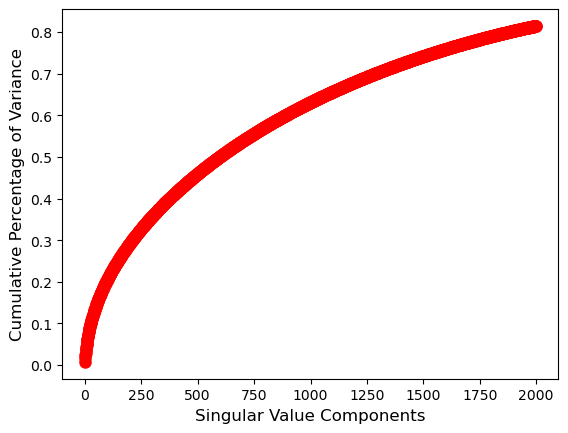

In [48]:
# Check for the explained variance after Dimensionality Reduction
explained = svd.explained_variance_.cumsum()
plt.plot(explained,'.-',ms=16,color='red')
plt.xlabel("Singular Value Components",fontsize=12)
plt.ylabel("Cumulative Percentage of Variance",fontsize=12)
plt.show()
# The graph shows that 80% variablity is retained after reducing 10000 columns to 2000 columns

In [49]:

# Generate cosine similarity Matrix 
cosine_similarity_matrix = cosine_similarity(latent_matrix,latent_matrix)

In [50]:
# Check the shape of Cosine Similarity Matrix
cosine_similarity_matrix.shape

(4005, 4005)

In [51]:
# Let's Take input as Title of TED-Talk "'Do schools kill creativity?'" to create 10 recommendations
ted_talk = 'Do schools kill creativity?'

In [52]:
# Create a index - title dictionary
index_title_dict = dict(zip(list(final_data.index),final_data['title']))
# Create a title - index dictionary
title_index_dict = {title:index for index,title in index_title_dict.items()}

In [53]:
# Sort the Top 10 indices with highest similarity
top_10_similar_tedTalks = sorted(list(enumerate(cosine_similarity_matrix[title_index_dict[ted_talk]])),reverse=True,key=(lambda x: x[1]))[1:11]

In [54]:
# Get the indices for recommendations
top_10_similar_tedTalks_indices = [mostSimilarTalk[0] for mostSimilarTalk in  top_10_similar_tedTalks]

In [55]:
top_10_similar_tedTalks_indices

[1451, 660, 682, 1861, 176, 1997, 1446, 1370, 2900, 2558]

In [56]:
# Get the recommended ted talks
for index in top_10_similar_tedTalks_indices:
    print(index_title_dict[index])

How to escape education's death valley
Bring on the learning revolution!
Education innovation in the slums
How to run a company with (almost) no rules
Rebuilding a neighborhood with beauty, dignity, hope
How I stopped the Taliban from shutting down my school
Our failing schools. Enough is enough!
Kids need structure
Why I fight for the education of refugee girls (like me)
The global learning crisis -- and what to do about it
